# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude (Python library)
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#pip install citipy

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# Get weather data and check out the necessry keywords for the queries
response = requests.get(query_url + city).json()

print(f"The weather API responded with: {response}.")

The weather API responded with: {'coord': {'lon': 103.1635, 'lat': 23.306}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.58, 'feels_like': 36.27, 'temp_min': 39.58, 'temp_max': 39.58, 'pressure': 1014, 'humidity': 96, 'sea_level': 1014, 'grnd_level': 788}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 145, 'gust': 6.44}, 'clouds': {'all': 72}, 'dt': 1643564794, 'sys': {'country': 'CN', 'sunrise': 1643586480, 'sunset': 1643626398}, 'timezone': 28800, 'id': 1810240, 'name': 'Gejiu', 'cod': 200}.


In [6]:
# Build a list 

citylist = []
lat = []
lon = []
temp = []
humidity = []
clouds = []
wind_rate = []
country = []
date = []

count = 0

for city in cities:
        try:
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            wind_rate.append(response['wind']['speed'])
            country.append(response["sys"]["country"])
            date.append(response['dt'])
            citylist.append(city)
            print(f"Processing city: {city}")
        except:
            print(f"City NOT found. Skip {city}")
        count+=1
        
        # Add a one second interval between queries to stay within API query limits
        time.sleep(1)

print(f"Data Retrieval Complete")
        
        
    

Processing city: ushuaia
Processing city: puerto ayora
Processing city: bluff
Processing city: ahuimanu
Processing city: ahipara
Processing city: hermanus
Processing city: souillac
Processing city: hilo
Processing city: namibe
Processing city: carnarvon
Processing city: punta arenas
Processing city: kirakira
Processing city: husavik
Processing city: kapaa
Processing city: lompoc
Processing city: bredasdorp
City NOT found. Skip nizhneyansk
Processing city: albany
Processing city: vaini
Processing city: saskylakh
Processing city: faya
City NOT found. Skip barentsburg
Processing city: yumen
Processing city: hervey bay
Processing city: kudahuvadhoo
Processing city: kodiak
Processing city: tutoia
Processing city: chicama
Processing city: khatanga
Processing city: aklavik
Processing city: gorin
Processing city: guerrero negro
Processing city: rikitea
Processing city: cape town
City NOT found. Skip yirol
Processing city: san cristobal
Processing city: lavrentiya
Processing city: carutapera
Pr

City NOT found. Skip temaraia
Processing city: khor
Processing city: makakilo city
Processing city: airai
Processing city: ust-omchug
City NOT found. Skip sadowara
Processing city: rocha
City NOT found. Skip cape elizabeth
Processing city: torbay
Processing city: setubal
Processing city: santa isabel do rio negro
Processing city: abbeville
Processing city: camarillo
Processing city: takoradi
Processing city: pasighat
Processing city: bambous virieux
Processing city: cidreira
Processing city: college
Processing city: kashi
Processing city: brae
City NOT found. Skip attawapiskat
Processing city: isangel
Processing city: malaba
Processing city: hortolandia
Processing city: limoges
Processing city: sabla
Processing city: meulaboh
Processing city: portland
City NOT found. Skip sinkat
Processing city: taxco
Processing city: cockburn town
Processing city: pevek
Processing city: illela
Processing city: shache
Processing city: kamenka
Processing city: teguldet
Processing city: basco
Processing 

Processing city: tomatlan
Processing city: saint-joseph
Processing city: mountain home
Processing city: alzamay
Processing city: olinda
Processing city: gejiu
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a data frame from the raw data

weather_df = pd.DataFrame({"City": citylist,
                           "Country": country,
                           "Max Temp": temp,
                           "Humidity": humidity,
                           "Cloudiness": clouds,
                           "Wind Speed":wind_rate,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

weather_df.head()

,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
0,ushuaia,AR,47.86,66,75,25.32,-54.8000,-68.3000,1643564796
1,puerto ayora,EC,82.36,71,100,8.81,-0.7393,-90.3518,1643564797
2,bluff,NZ,58.80,92,87,3.58,-46.6000,168.3333,1643564798
3,ahuimanu,US,73.45,71,75,1.01,21.4447,-157.8378,1643564800
4,ahipara,NZ,60.84,91,100,7.87,-35.1667,173.1667,1643564801


In [33]:
# Export the data to a .csv. Saved twice to get it to the correct folder.

weather_df.to_csv('cities.csv', encoding="utf-8",index = False)
weather_df.to_csv('../output_data/cities1.csv')


In [10]:
# Check to see if any of the cities has higher than 100% humidity
weather_df.describe()


,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,51.128286,71.176786,60.158929,8.192268,19.771534,20.015755,1.643565e+09
std,31.943800,22.444425,38.136485,6.409847,32.818111,91.041055,2.443204e+02
min,-34.730000,8.000000,0.000000,0.000000,-54.800000,-179.166700,1.643564e+09
25%,30.675000,59.000000,20.000000,3.060000,-8.036200,-63.355575,1.643565e+09
50%,62.485000,75.000000,75.000000,6.680000,21.108350,26.320650,1.643565e+09
75%,76.825000,90.000000,99.000000,11.500000,47.721475,100.340125,1.643565e+09
max,96.980000,100.000000,100.000000,34.520000,78.218600,178.416700,1.643566e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
The scatter plot below indicates that the higher temperatures cluster around the latitudes between -40 and 20.

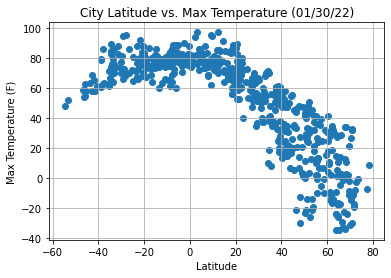

In [27]:
# Build a scatter plot for latitude vs. temperature 
plt.scatter(weather_df['Latitude'], weather_df['Max Temp'], marker="o")

# Label axes and title and format time
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Save the figure before plotting so graph can be viewed later
plt.savefig("spltlatvstemp.png")

plt.grid(True)

# Show plot
plt.show()



## Latitude vs. Humidity Plot
The scatter plot below indicates that there is no correlation between latitude and humidity.

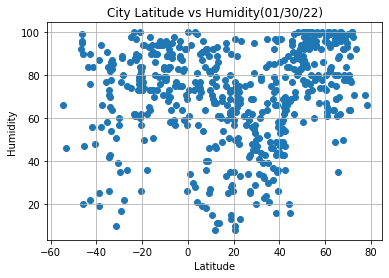

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("spltlatvshumidity.png")
plt.grid(True)

# Show plot
plt.show()


## Latitude vs. Cloudiness Plot
The scatter plot below shows no correlation between latitude and cloudiness.

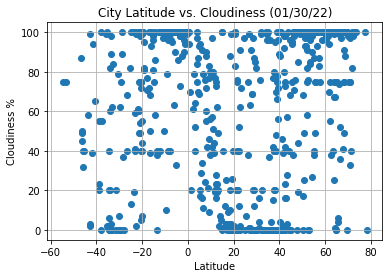

In [29]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")

# Save the figure before plotting.
plt.savefig("spltlatvsclouds.png")
plt.grid(True)

# Show plot
plt.show()



## Latitude vs. Wind Speed Plot
The scatter plot show no correlation between latitude and wind speed. The data reveals that most recorded wind speeds fall in the 0 to 25 mph range.

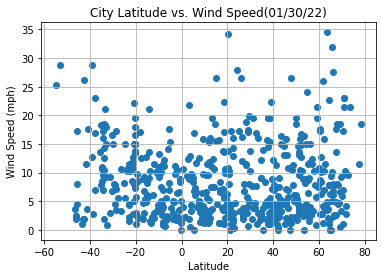

In [30]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure before plotting
plt.savefig("spltlatvswind.png")
plt.grid(True)

# Show plot
plt.show()



## Linear Regression

In [15]:
# Split the data into Northern (lat >==0) and Southern Hemispheres (lat < 0)

northern_df = weather_df.loc[(weather_df["Latitude"]>=0)]
southern_df = weather_df.loc[(weather_df["Latitude"]<0)]


In [16]:
northern_df.count()

City          386
Country       386
Max Temp      386
Humidity      386
Cloudiness    386
Wind Speed    386
Latitude      386
Longitude     386
Date          386
dtype: int64

In [17]:
southern_df.count()

City          174
Country       174
Max Temp      174
Humidity      174
Cloudiness    174
Wind Speed    174
Latitude      174
Longitude     174
Date          174
dtype: int64

In [34]:
# Define the linear regression function along with the scatter plot for each graph
# This worked except for saving the graphs - could not figure it out!

#def line_regr(x_values, y_values, yaxis):

    #(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #regress_values = slope * x_values + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

    # Scatter Plots    
    #plt.scatter(x_values,y_values)
    #plt.plot(x_values,regress_values, color = "red")
    #plt.xlabel('Latitude')
    #plt.ylabel(yaxis)
    #print(f"The correlation coefficient is {rvalue}")
    #print(f"The regression equation is {line_eq}")
    #plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a strong correlation between latitude and maximun temperature for cities in the Northern Hemisphere. As the latitude increases, temperature decreases. In other words, the closer the city is to the equator, the higher the maximum temperature.

The correlation coefficient is -0.8651934109511233
The regression equation is y = -1.39x + 93.12


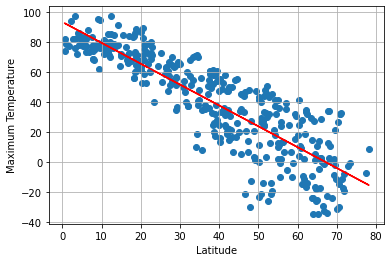

In [39]:
# Plot scatter plot with line of regression for Northern Hemisphere - max temp vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig("NHlatvstemp.png")
plt.grid(True)
print(f"The correlation coefficient is {rvalue}")
print(f"The regression equation is {line_eq}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

There is no correlation between latitudes in the southern hemisphere and maximum temperatures.

The correlation coefficient is 0.4809797615018107
The regression equation is y = 0.32x + 81.7


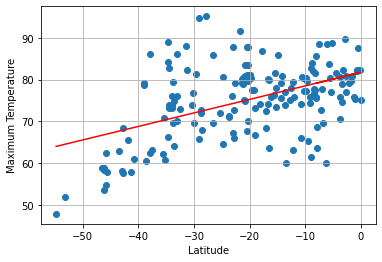

In [40]:
# Plot scatter plot with line of regression for Southern Hemisphere - max temp vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig("SHlatvstemp.png")
plt.grid(True)
print(f"The correlation coefficient is {rvalue}")
print(f"The regression equation is {line_eq}")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is no correlation between latitude for cities in the Northern Hemisphere and humidity.

The correlation coefficient is 0.40074804358205957
The regression equation is y = 0.46x + 52.43


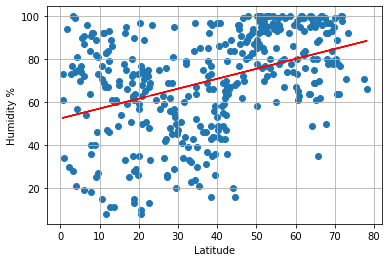

In [41]:
# Plot scatter plot and regression line for Northern Hemisphere - humidity vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig("NHlatvshumidity.png")
plt.grid(True)
print(f"The correlation coefficient is {rvalue}")
print(f"The regression equation is {line_eq}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is no correlation between latitude for cities in the Southern Hemisphere and humidity.

The correlation coefficient is 0.27771987916361296
The regression equation is y = 0.42x + 82.42


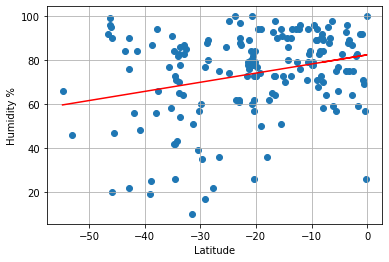

In [42]:
# Plot scatter plot and regression line for Southern Hemisphere - humidity vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig("SHlatvshumidity.png")
plt.grid(True)
print(f"The correlation coefficient is {rvalue}")
print(f"The regression equation is {line_eq}")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is no correlation between cloudiness for cities in the Northern Hemisphere and humidity.

The correlation coefficient is 0.34340397098770065
The regression equation is y = 0.66x + 31.84


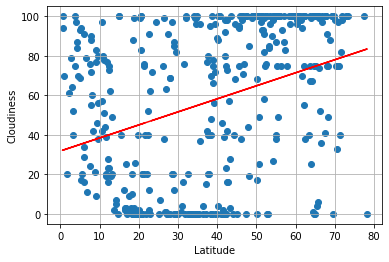

In [43]:
# Plot scatter plot and line of regression for Northern Hemisphere - cloudiness vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("NHlatvsclouds.png")
plt.grid(True)
print(f"The correlation coefficient is {rvalue}")
print(f"The regression equation is {line_eq}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is no correlation between latitude for cities in the Southern Hemisphere and cloudiness.

The correlation coefficient is 0.5111911567881802
The regression equation is y = 1.35x + 95.36


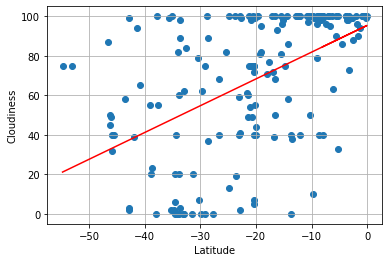

In [44]:
# Plot scatter plot and line of regression for Southern Hemisphere - cloudiness vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("SHlatvsclouds.png")
plt.grid(True)
print(f"The correlation coefficient is {rvalue}")
print(f"The regression equation is {line_eq}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no correlation between latitude for cities in the Northern Hemisphere and windspeed.

The correlation coefficient is 0.09388426125441554
The regression equation is y = 0.03x + 6.82


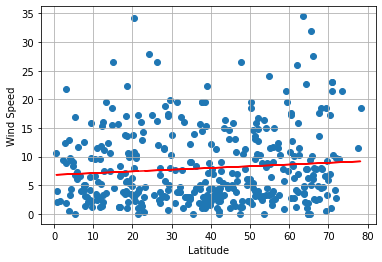

In [45]:
# Plot scatter plot and line of regression for Northern Hemisphere - wind speed vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("NHlatvswind.png")
plt.grid(True)
print(f"The correlation coefficient is {rvalue}")
print(f"The regression equation is {line_eq}")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no correlation between latitude for cities in the Southern Hemisphere and wind speed.

The correlation coefficient is -0.34574343021958265
The regression equation is y = -0.16x + 5.37


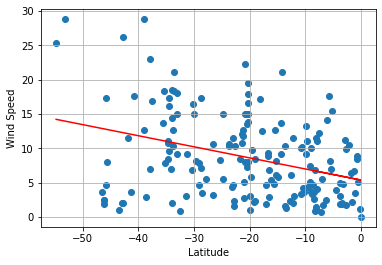

In [46]:
# Plot scatter plot and line of regression for Southern Hemisphere - wind speed vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("SHlatvswind.png")
plt.grid(True)
print(f"The correlation coefficient is {rvalue}")
print(f"The regression equation is {line_eq}")
plt.show()